# Fraudulent Activities

### OBJECTIF

Les sites de E-commerce font transiter beaucoup d'argent. Cela peut engendrer des risques non négligeables d'activités frauduleuses, comme l'utilisation de carte de crédit volées, du blanchiment d'argent, etc.

Fort heureusement, le Machine Learning peut nous aider à identifier ces activités frauduleuses. Tous les sites web où vous devez entrer vos informations de paiements ont une équipe qui s'occupe de gérer les risques de fraude via le ML.

Le but de ce challenge est de construire un modèle qui vous permet de prédire une probabilité de transaction frauduleuse.

### DESCRIPTION

L'entreprise X fait du E-commerce et vend des vêtements faits-main. Le but est de construire un modèle qui permette de prédire si l'achat d'un vêtement doit être considéré comme une transaction frauduleuse ou non.

Liste des tâches :

1. Pour chacun des utilisateurs, déterminez le pays d'origine depuis son adresse IP

2. Construisez un modèle qui permette de prédire si l'activité est frauduleuse ou non.

3. Votre patron aimerait comprendre votre modèle car il est inquiet d'utiliser un modèle _black box_. Comment l'expliqueriez vous d'un point utilisateur, et non pas mathématique. Par exemple, quels sont les utilisateurs qui peuvent être classés comme _risqués_ ?

4. Supposons que vous pouvez utiliser votre modèle en live pour qu'il fasse sa prédiction en temps réel. D'un point de vue Produit, comment l'utiliseriez-vous ? Comment pourriez-vous penser l'expérience utilisateur face à ce produit ?



# 1 - Entrainer un premier algorithme simple sur les données avec un preprocessing minimal (principalement du drop)

## Importing libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

In [75]:
data = pd.read_csv('Fraud_Data.csv')
ipAdd = pd.read_csv('IpAddress_to_Country.csv')

In [76]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [77]:
ipAdd.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## Dataset basic features enginering

In [78]:
data = data.drop(["user_id", "device_id", "signup_time", "purchase_time", "ip_address"], axis = 1)
data.head()

,purchase_value,source,browser,sex,age,class
0,34,SEO,Chrome,M,39,0
1,16,Ads,Chrome,F,53,0
2,15,SEO,Opera,M,53,1
3,44,SEO,Safari,M,41,0
4,39,Ads,Safari,M,45,0


In [113]:
X = data.loc[:,data.columns != 'class']
y = data.loc[:,data.columns == 'class']

In [114]:
from sklearn.preprocessing import  StandardScaler

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [116]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

##  Models performance assessment

###  - LogisticRegressionCV

In [84]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score

In [89]:
y_test1 = pd.DataFrame(y_test.copy())

In [93]:
#LogisticRegressionCV
Logistic_CV = LogisticRegressionCV(cv=10, solver='liblinear',  n_jobs=-1, class_weight = {0:1,1:4} )
%time Logistic_CV.fit(X_train_scaled, y_train)
y_test_pred1 = Logistic_CV.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred1))
print('f1_score : ', f1_score(y_test1, y_test_pred1))

Wall time: 8.01 s
accuracy_score :  0.9063616711518948
f1_score :  0.0


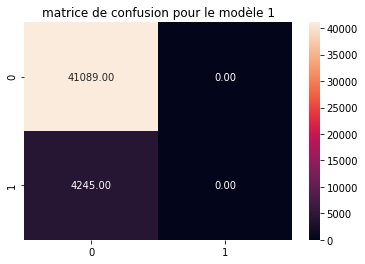

In [94]:
from sklearn.metrics import confusion_matrix
model1 = confusion_matrix(y_test1, y_test_pred)
sns.heatmap(model1, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 1')
plt.show()

###  -  DecisionTree with hyperparameter entropy criterion

In [101]:
#DecisionTree(entropy)
from sklearn.tree import DecisionTreeClassifier
Tree_gini = DecisionTreeClassifier(criterion='entropy')
%time Tree_gini.fit(X_train_scaled, y_train)
y_test_pred2 = Tree_gini.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred2))
print('f1_score : ', f1_score(y_test1, y_test_pred2))

Wall time: 339 ms
accuracy_score :  0.9134203908766048
f1_score :  0.5004454626447753


  -  **Visualization of confusion matrix**

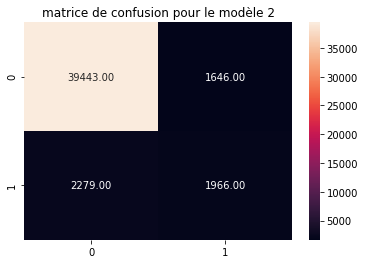

In [102]:
from sklearn.metrics import confusion_matrix
model2 = confusion_matrix(y_test1, y_test_pred2)
sns.heatmap(model2, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 2')
plt.show()

### - Random Forest

In [109]:
#Random Forest(100)
from sklearn.ensemble import RandomForestClassifier
Forest_100 = RandomForestClassifier()
%time Forest_100.fit(X_train_scaled, y_train)
y_test_pred3 = Forest_100.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred3))
print('f1_score : ', f1_score(y_test1, y_test_pred3))

Wall time: 10.8 s
accuracy_score :  0.9203908766047558
f1_score :  0.527555962822359


  -  **Visualization of confusion matrix**

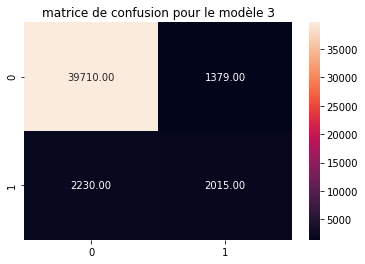

In [110]:
#Random Forest(100)
from sklearn.metrics import confusion_matrix
model3 = confusion_matrix(y_test1, y_test_pred3)
sns.heatmap(model3, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 3')
plt.show()

In [118]:
#Random Forest(50)
from sklearn.ensemble import RandomForestClassifier
Forest_50 = RandomForestClassifier(n_estimators=50, n_jobs=-1)
%time Forest_50.fit(X_train_scaled, y_train)
y_test_pred4 = Forest_50.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test1, y_test_pred4))
print('f1_score : ', f1_score(y_test1, y_test_pred4))

Wall time: 3.37 s
accuracy_score :  0.9186482551727181
f1_score :  0.5207900207900208


  -  **Visualization of confusion matrix**

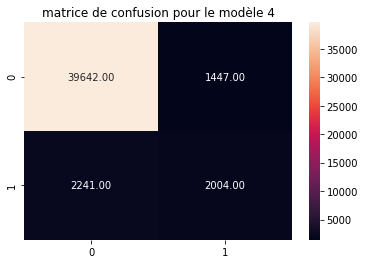

In [119]:
#Random Forest(50)
from sklearn.metrics import confusion_matrix
model4 = confusion_matrix(y_test1, y_test_pred4)
sns.heatmap(model4, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 4')
plt.show()

### - GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

In [39]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50, 100),
          'max_depth' : [4,6,8,10],
          'max_features':[2,3,4] }

grid = GridSearchCV(cv=10, estimator = random_grid, param_grid = params, n_jobs=-1 )
%time grid.fit(X_train_scaled, y_train)

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1min 26s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [41]:
grid.best_params_

{'max_depth': 10, 'max_features': 2, 'n_estimators': 20}

In [42]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.9073984206114616

---

# 2 - Entrainer un algorithme simple sur les données avec un preprocessing plus avancé: 

##  Loading dataset

In [2]:
data = pd.read_csv("Fraud_Data.csv")
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
ipAdd = pd.read_csv("IpAddress_to_Country.csv")
ipAdd.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


##  Dataset advanced features enginering

- Create a function << **ip_to_country** >> that takes an IP address as argument and returns country associated based on IP_table

In [4]:
def ip_to_country(ip=None):
    try :
        return ipAdd.country[(ipAdd.lower_bound_ip_address <= ip) 
                             & (ipAdd.upper_bound_ip_address >= ip)].iloc[0]
    except IndexError :
        return "Unknown"     
# To affect a country to each IP :
%time data["ip_country"] = data.ip_address.apply(ip_to_country)

Wall time: 3min 8s


In [5]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


- Converting dataset date columns into **datetime type**

In [6]:
from datetime import datetime, time

In [7]:
data.signup_time = data.signup_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
data.purchase_time = data.purchase_time.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

- Creating new column *delta_signup_purchase* by getting the time laps between *signup_time* and *purchase_time* columns newly converted into datetime date type

In [8]:
data['delta_signup_purchase'] = data.purchase_time - data.signup_time

In [137]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country,delta_signup_purchase
0,22058,2015-02-24,2015-04-18,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,53 days
1,333320,2015-06-07,2015-06-08,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1 days
2,1359,2015-01-01,2015-01-01,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0 days
3,150084,2015-04-28,2015-05-04,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,6 days
4,221365,2015-07-21,2015-09-09,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50 days


In [131]:
data.shape

(151112, 13)

In [132]:
data['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [82]:
data['ip_address'].value_counts(ascending=False)

3.874758e+09    20
5.760609e+08    20
2.050964e+09    20
1.502818e+09    20
2.937899e+09    19
                ..
1.101289e+09     1
2.730533e+09     1
3.912052e+09     1
3.192721e+09     1
2.991295e+09     1
Name: ip_address, Length: 143512, dtype: int64

In [62]:
data.device_id.value_counts(ascending=False)

ITUMJCKWEYNDD    20
CQTUVBYIWWWBC    20
ZUSVMDEZRBDTX    20
NGQCKIADMZORL    20
KIPFSCNUGOLDP    20
                 ..
OOICEHDMUBFPQ     1
CAHRUKMOGPVKQ     1
RGIUGLTJWHEJS     1
NKBJWJYIYOUEM     1
KHIKOXFDZRITG     1
Name: device_id, Length: 137956, dtype: int64

In [83]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country,delta_signup_purchase
0,22058,2015-02-24,2015-04-18,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,53 days
1,333320,2015-06-07,2015-06-08,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1 days
2,1359,2015-01-01,2015-01-01,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,0 days
3,150084,2015-04-28,2015-05-04,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,6 days
4,221365,2015-07-21,2015-09-09,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,50 days


- Removing *user_id, signup_time, purchase_time, device_id and ip_address* columns from dataset befor machine learning

In [10]:
df1 = data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address'], axis =1)
df1.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53 days
1,16,Ads,Chrome,F,53,0,United States,1 days
2,15,SEO,Opera,M,53,1,United States,0 days
3,44,SEO,Safari,M,41,0,Unknown,6 days
4,39,Ads,Safari,M,45,0,United States,50 days


- Filtering dataset on *ip_country* column where the country is not  **Unknows** 

In [11]:
df2 = df1[df1['ip_country']!='Unknown']

- Removing any future warnings messages

In [12]:
import warnings
warnings.filterwarnings('ignore')

**Removing word << days >> from *delta_signup_purchase* column data :**

1. Converting *delta_signup_purchase* column into string in order to use **str function**
2. Apply **split function** to *delta_signup_purchase* column in order to split column data, will return a list
3. Take the first argument on this list witch should the number of day
4. Convert this number of day into integer

In [13]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: str(x))

In [14]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: x.split(" "))

In [15]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: x[0])

In [16]:
df2.delta_signup_purchase = df2.delta_signup_purchase.apply(lambda x: int(x))

---

## Exploratory Visulization of the dataset

In [525]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


#### Visualization of fraud according to age

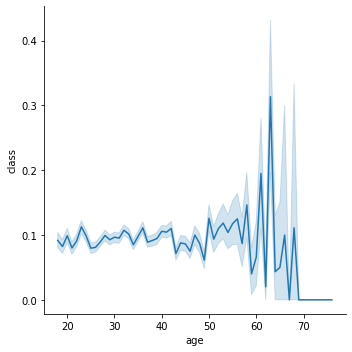

In [14]:
# Visualisation  des fraudes en fonction de l'âge 
sns.relplot(data = df2, y = 'class', x = 'age', kind='line')

#### Visualization of fraud according to age with focus on ages greater or equal to 55 

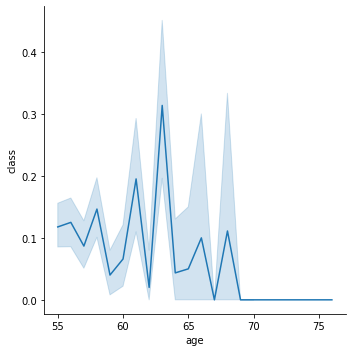

In [15]:
# Visualisation  des fraudes en fonction de l'âge supérieur ou égale à 55 ans 
sns.relplot(data = df2.query('age>=55'), y = 'class', x = 'age', kind='line')

Nous observons un risque de transactions frauduleuses relativement elevé dans la tranche d'âge de 62 à 68 ans et décroit au délas de 70 ans.



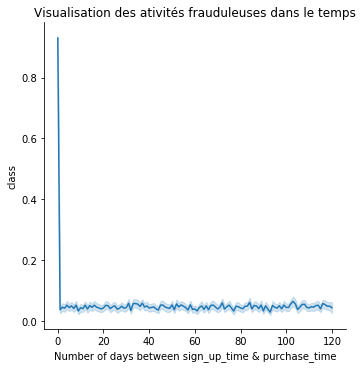

In [21]:
sns.relplot(data = df2, y = 'class', x = 'delta_signup_purchase', kind='line')
plt.title('Visualisation des ativités frauduleuses dans le temps')
plt.xlabel('Number of days between sign_up_time & purchase_time')
plt.show()

#### Visualization of fraudulent activities in time timeline

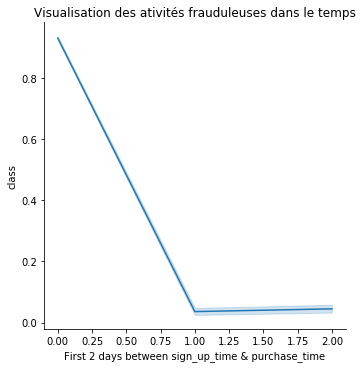

In [22]:
sns.relplot(data = df2.query('delta_signup_purchase<2.5'), y = 'class', x = 'delta_signup_purchase', kind='line')
plt.title('Visualisation des ativités frauduleuses dans le temps')
plt.xlabel('First 2 days between sign_up_time & purchase_time')
plt.show()

Le risque de fraude est fortement accru dans les premières 24h suivant l'inscription et s'attenu par la suite.

#### Visualization of fraud activities according to the time lapse between *signup_time* and *purchase_time* columns

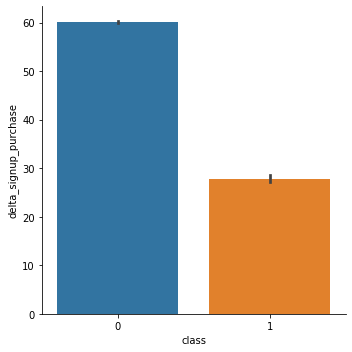

In [526]:
sns.catplot(data = df2, x ='class', y ='delta_signup_purchase', kind='bar')

### Visualization  of fraud according to countries

- Processing data for map

In [598]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [562]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [147]:
import geopandas

- Loading world_map dataset

In [148]:
world_map = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


- Creating a new dataset for map with *country_name and the count of Number_of_fraud*

In [149]:
df3_for_map = pd.DataFrame({'country_name':df2[df2['class']==1].ip_country.value_counts().index, 'Number_of_fraud':df2[df2['class']==1].ip_country.value_counts().values}) 

In [150]:
df3_for_map.head()

,country_name,Number_of_fraud
0,United States,5551
1,China,1043
2,Japan,715
3,United Kingdom,477
4,Korea Republic of,380


Some countries name on world_map dataset dosen't match  with the corresponding  countrie's name in our new dataset created ( df3_for_map ) , so i just made changes for United States where i used **map function** to get a match.

In [151]:
df3_for_map.country_name = df3_for_map.country_name.apply(lambda x: 'United States of America' if x=='United States'
                      else x)

- Merging datasets world_map and df3_for_map

In [152]:
merged_for_map = world_map.merge(df3_for_map, left_on = 'name', right_on = 'country_name')

In [69]:
merged_for_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,Number_of_fraud
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,348
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,5551
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,6
3,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,2
4,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,57


### Visualization  of fraud according to country

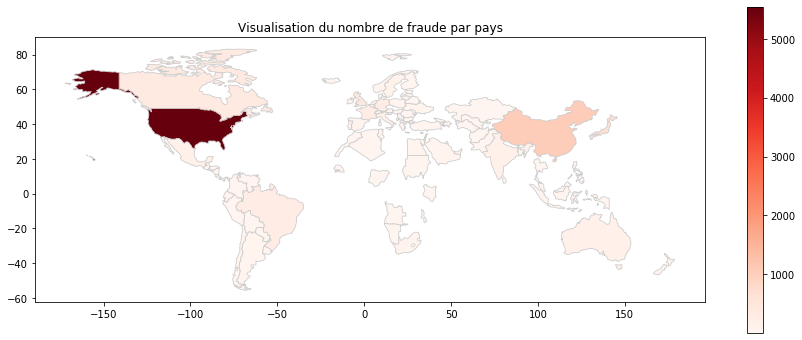

In [156]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Number_of_fraud'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 6))
merged_for_map.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.title('Visualisation du nombre de fraude par pays')
plt.show()

**Les USA, la chine et le Japon sont le Top 3 des pays ayant le plus de fraudeurs.**

---

##  Models performance assessment

#### Nous allons continuer avec les mêmes data traités (df2)

In [68]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [78]:
X = df2.loc[:,df2.columns != 'class']
y = df2.loc[:,df2.columns == 'class']

In [79]:
X= pd.get_dummies(X, drop_first=True)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [81]:
X_train.shape

(90402, 190)

In [82]:
X_test.shape

(38744, 190)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
X_train_scaled.shape

(90402, 190)

In [85]:
X_test_scaled.shape

(38744, 190)

In [86]:
y_test2 = pd.DataFrame(y_test.copy())
y_test2.head()

,class
136062,0
64266,0
128561,0
135214,0
25392,0


In [54]:
#Modèle 1 avec un data preprocessing plus avancé ==> model5
#LogisticRegressionCV
from sklearn.metrics import f1_score, accuracy_score
Logistic_CV = LogisticRegressionCV(cv=10, solver='liblinear',  n_jobs=-1, class_weight = {0:1,1:4} )
%time Logistic_CV.fit(X_train_scaled, y_train)
y_test_pred5 = Logistic_CV.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred5))
print('f1_score : ', f1_score(y_test2, y_test_pred5))

Wall time: 38.5 s
accuracy_score :  0.9099989675820772
f1_score :  0.530749562642982


  -  **Visualization of confusion matrix**

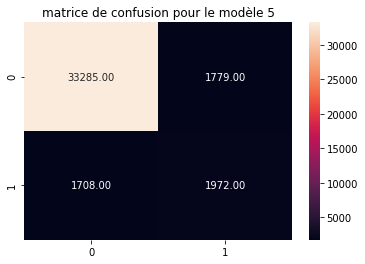

In [55]:
#Modèle 1 avec un data preprocessing plus avancé ==> model5
#LogisticRegressionCV
from sklearn.metrics import confusion_matrix
model5 = confusion_matrix(y_test2, y_test_pred5)
sns.heatmap(model5, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 5')
plt.show()

In [65]:
#Modèle 2 avec un data preprocessing plus avancé ==> model6
#DecisionTree(entropy)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
Tree_entropy = DecisionTreeClassifier(criterion='entropy')
%time Tree_entropy.fit(X_train_scaled, y_train)
y_test_pred6 = Tree_entropy.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred6))
print('f1_score : ', f1_score(y_test2, y_test_pred6))

Wall time: 4.45 s
accuracy_score :  0.9076760272558332
f1_score :  0.5476160364234222


  -  **Visualization of confusion matrix**

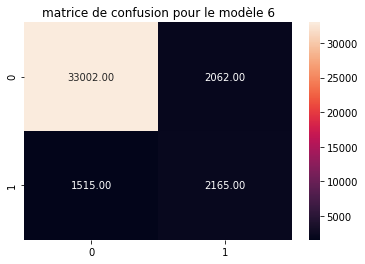

In [66]:
#Modèle 2 avec un data preprocessing plus avancé ==> model6
#DecisionTree(entropy)
from sklearn.metrics import confusion_matrix
model6 = confusion_matrix(y_test2, y_test_pred6)
sns.heatmap(model6, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 6')
plt.show()

In [76]:
#Modèle 3 avec un data preprocessing plus avancé ==> model7
#Random Forest(100)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
Forest_100 = RandomForestClassifier()
%time Forest_100.fit(X_train_scaled, y_train)
y_test_pred7 = Forest_100.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred7))
print('f1_score : ', f1_score(y_test2, y_test_pred7))

Wall time: 47.3 s
accuracy_score :  0.9552704934957671
f1_score :  0.7054224035356111


  -  **Visualization of confusion matrix**

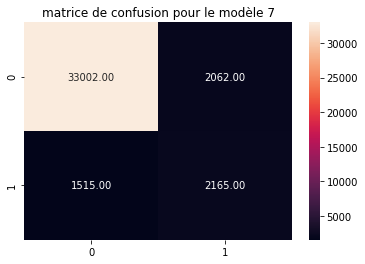

In [77]:
#Modèle 3 avec un data preprocessing plus avancé ==> model7
#Random Forest(100)
from sklearn.metrics import confusion_matrix
model7 = confusion_matrix(y_test2, y_test_pred6)
sns.heatmap(model7, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 7')
plt.show()

In [87]:
#Modèle 4 avec un data preprocessing plus avancé ==> model8
#Random Forest(50)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
Forest_50 = RandomForestClassifier(n_estimators=50, n_jobs=-1)
%time Forest_50.fit(X_train_scaled, y_train)
y_test_pred8 = Forest_50.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test2, y_test_pred8))
print('f1_score : ', f1_score(y_test2, y_test_pred8))

Wall time: 13.9 s
accuracy_score :  0.9552704934957671
f1_score :  0.7054224035356111


  -  **Visualization of confusion matrix**

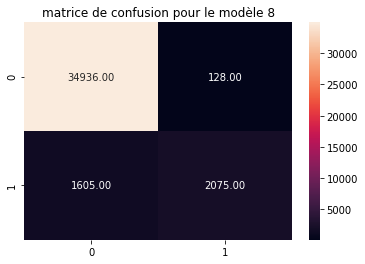

In [88]:
#Modèle 4 avec un data preprocessing plus avancé ==> model8
#Random Forest(50)
from sklearn.metrics import confusion_matrix
model8 = confusion_matrix(y_test2, y_test_pred8)
sns.heatmap(model8, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 8')
plt.show()

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = RandomForestClassifier()
params = {"n_estimators": range(20, 50, 100),
          'max_depth' : [4,6,8,10],
          'max_features':[2,3,4] }

grid = GridSearchCV(cv=10, estimator = random_grid, param_grid = params, n_jobs=-1 )
%time grid.fit(X_train_scaled, y_train)

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 1min 16s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [144]:
grid.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 20}

In [145]:
grid.best_estimator_.score(X_test_scaled, y_test)

0.9050175511046872

---

# 3 - Pousser l'algorithme pour améliorer la performance avec du boosting, voting et stacking.

In [ ]:
# Nous allons continuer avec les mêmes data traité (df2)

In [96]:
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [96]:
X = df2.loc[:,df1.columns != 'class']
y = df2.loc[:,df1.columns == 'class']

In [97]:
X= pd.get_dummies(X, drop_first=True)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [99]:
!pip install missingpy
from missingpy import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
y_test3 = pd.DataFrame(y_test.copy())
y_test3.head()

,class
136062,0
64266,0
128561,0
135214,0
25392,0


###  Models performance assessment

In [102]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
#Modèle 9
# SVM 
svm = SVC()
%time svm.fit(X_train_scaled, y_train)
y_test_pred = svm.predict(X_test_scaled)
print('accuracy_score', accuracy_score(y_test3, y_test_pred9))
print('f1_score', f1_score(y_test3, y_test_pred9))

Wall time: 49min 18s


NameError: name 'y_test_pred9' is not defined

In [ ]:
#Modèle 9
# SVM 
from sklearn.metrics import confusion_matrix
model9 = confusion_matrix(y_test3, y_test_pred9)
sns.heatmap(model9, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 9')
plt.show()

In [107]:
#Modèle 10
# Voting
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators = [
                  ("svc", SVC()), 
                  ("logreg", LogisticRegression()), 
                  ("tree", DecisionTreeClassifier())
                  ],
n_jobs=-1
)

In [387]:
# Voting
%time voting.fit(X_train_scaled, y_train)
y_test_pred10 = voting.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test3, y_test_pred10))
print('f1_score : ', f1_score(y_test3, y_test_pred10))

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 43min 1s
accuracy_score :  0.9061532108197399
f1_score :  0.02415458937198068


In [109]:
# Voting
# Le f1_score  trop bas pour le modèle 10

In [398]:
#Modèle 11
# Stacking
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(
    estimators = [
                  ("svc", SVC()), 
                  ("logreg", LogisticRegression()), 
                  ("tree", DecisionTreeClassifier())
                  ], 
    n_jobs=-1,
    final_estimator=LogisticRegressionCV()
)

In [399]:
#Modèle 11
# Stacking
%time stacking.fit(X_train, y_train)
y_test_pred11 = stacking.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test3, y_test_pred11))
print('f1_score : ', f1_score(y_test3, y_test_pred11))

C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Youssouf\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 32min 41s
accuracy_score :  0.8700443939706793
f1_score :  0.15562636256917659


In [110]:
# Stacking
# Le f1_score  trop bas pour le modèle 11

---

### Boosting

In [104]:
#  data traité
df2.head()

,purchase_value,source,browser,sex,age,class,ip_country,delta_signup_purchase
0,34,SEO,Chrome,M,39,0,Japan,53
1,16,Ads,Chrome,F,53,0,United States,1
2,15,SEO,Opera,M,53,1,United States,0
4,39,Ads,Safari,M,45,0,United States,50
5,42,Ads,Chrome,M,18,0,Canada,49


In [238]:
X = df2.loc[:,df1.columns != 'class']
y = df2.loc[:,df1.columns == 'class']

In [239]:
X= pd.get_dummies(X, drop_first=True)

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y )

In [241]:
!pip install missingpy
from missingpy import KNNImputer
imputer = KNNImputer()

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_test4 = pd.DataFrame(y_test.copy())

In [218]:
# Modèle 12, Boosting
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier 
from sklearn.linear_model import LinearRegression
#Adaboost = AdaBoostRegressor()
%time Adaboost.fit(X_train_scaled, y_train)

Wall time: 5.99 s


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [219]:
# Modèle 12, Boosting
#AdaBoostRegressor
y_test_pred12 = Adaboost.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test4, y_test_pred12.round()))
print('f1_score :' , f1_score(y_test4, y_test_pred12.round()))

accuracy_score :  0.9553479248399752
f1_score : 0.7056822048315754


  -  **Visualization of confusion matrix**

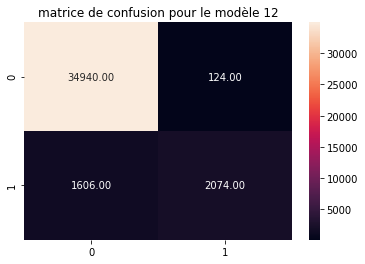

In [125]:
# Modèle 12, Boosting
#AdaBoostRegressor
from sklearn.metrics import confusion_matrix
model12 = confusion_matrix(y_test4, y_test_pred12.round())
sns.heatmap(model12, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 12')
plt.show()

In [200]:
# Modèle 13, Extreme Gradient Boosting
# XGBRegressor
!pip install xgboost
from xgboost import XGBClassifier
XGB_regressor = XGBClassifier(n_jobs=-1, learning_rate=0.8, max_depth= 2, max_features= 2)
%time XGB_regressor.fit(X_train_scaled, y_train)

Wall time: 31.7 s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.8, max_delta_step=0, max_depth=2, max_features=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [201]:
# Modèle 13, Extreme Gradient Boosting
# XGBRegressor
y_test_pred13 = XGB_regressor.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test, y_test_pred13))
print('f1_score :' ,f1_score(y_test4, y_test_pred13))

accuracy_score :  0.9553479248399752
f1_score : 0.7056822048315754


  -  **Visualization of confusion matrix**

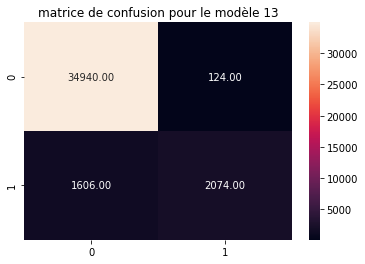

In [202]:
# Modèle 13, Extreme Gradient Boosting
# XGBRegressor
from sklearn.metrics import confusion_matrix
model13 = confusion_matrix(y_test4, y_test_pred13)
sns.heatmap(model13, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 13')
plt.show()

## Ensemble learning

In [225]:
# Modèle 14
# Voting
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators = [
                ("logreg", LogisticRegression()), 
                ("tree", DecisionTreeClassifier()),
                ("Random", RandomForestClassifier()),
                ("Adaboost", AdaBoostClassifier())

                  ],
n_jobs=-1
)

In [228]:
%time voting.fit(X_train_scaled, y_train)
y_test_pred14 = voting.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test4, y_test_pred14))
print('f1_score : ', f1_score(y_test4, y_test_pred14))

Wall time: 54.8 s
accuracy_score :  0.9564061532108198
f1_score :  0.7104405966055203


  -  **Visualization of confusion matrix**

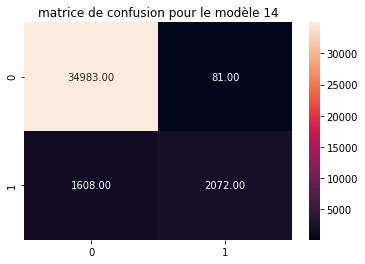

In [229]:
# Modèle 14
# Voting
from sklearn.metrics import confusion_matrix
model14 = confusion_matrix(y_test4, y_test_pred14)
sns.heatmap(model14, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 14')
plt.show()

In [243]:
# Modèle 15
# Stacking
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(
    estimators = [
                ("logreg", LogisticRegression()), 
                ("tree", DecisionTreeClassifier()),
                ("Random", RandomForestClassifier()),
                ("Adaboost", AdaBoostClassifier())
                  ], 
    n_jobs=-1,
    final_estimator=LogisticRegressionCV()
)

In [244]:
%time stacking.fit(X_train, y_train)
y_test_pred15 = stacking.predict(X_test_scaled)
print('accuracy_score : ', accuracy_score(y_test4, y_test_pred15))
print('f1_score : ', f1_score(y_test4, y_test_pred15))

Wall time: 3min 34s
accuracy_score :  0.8891699359900888
f1_score :  0.24534270650263618


  -  **Visualization of confusion matrix**

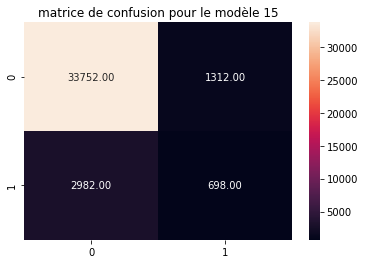

In [245]:
# Modèle 15
# Stacking
from sklearn.metrics import confusion_matrix
model15 = confusion_matrix(y_test4, y_test_pred15)
sns.heatmap(model15, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 15')
plt.show()

---

# Visualisation de la performance des modèles

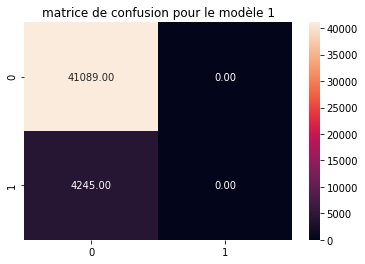

In [94]:
#model1
#LogisticRegressionCV
from sklearn.metrics import confusion_matrix
model1 = confusion_matrix(y_test1, y_test_pred)
sns.heatmap(model1, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 1')
plt.show()

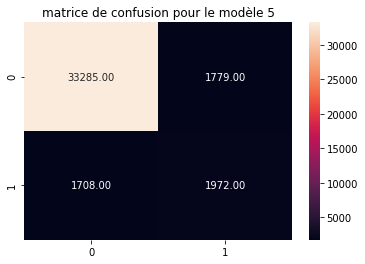

In [55]:
#Modèle 1 avec un data preprocessing plus avancé ==> model5
#LogisticRegressionCV
from sklearn.metrics import confusion_matrix
model5 = confusion_matrix(y_test2, y_test_pred5)
sns.heatmap(model5, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 5')
plt.show()

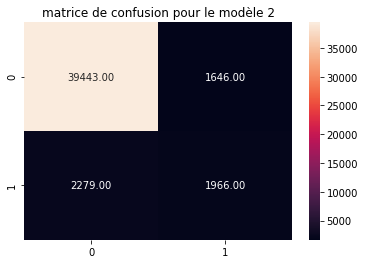

In [102]:
#model2
#DecisionTree(entropy)
from sklearn.metrics import confusion_matrix
model2 = confusion_matrix(y_test1, y_test_pred2)
sns.heatmap(model2, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 2')
plt.show()

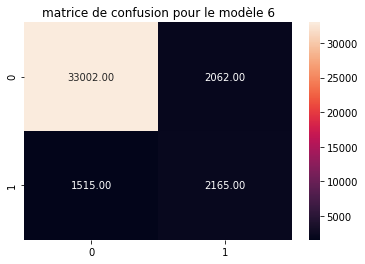

In [66]:
#Modèle 2 avec un data preprocessing plus avancé ==> model6
#DecisionTree(entropy)
from sklearn.metrics import confusion_matrix
model6 = confusion_matrix(y_test2, y_test_pred6)
sns.heatmap(model6, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 6')
plt.show()

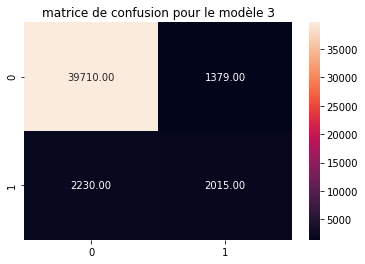

In [110]:
#model3
#Random Forest(100)
from sklearn.metrics import confusion_matrix
model3 = confusion_matrix(y_test1, y_test_pred3)
sns.heatmap(model3, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 3')
plt.show()

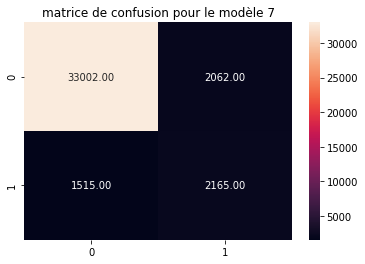

In [77]:
#Modèle 3 avec un data preprocessing plus avancé ==> model7
#Random Forest(100)
from sklearn.metrics import confusion_matrix
model7 = confusion_matrix(y_test2, y_test_pred6)
sns.heatmap(model7, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 7')
plt.show()

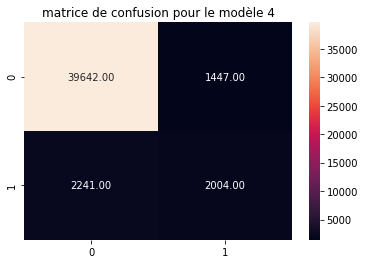

In [119]:
#model4
#Random Forest(50)
from sklearn.metrics import confusion_matrix
model4 = confusion_matrix(y_test1, y_test_pred4)
sns.heatmap(model4, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 4')
plt.show()

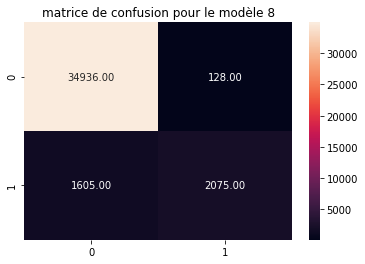

In [88]:
#Modèle 4 avec un data preprocessing plus avancé ==> model8
#Random Forest(50)
from sklearn.metrics import confusion_matrix
model8 = confusion_matrix(y_test2, y_test_pred8)
sns.heatmap(model8, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 8')
plt.show()

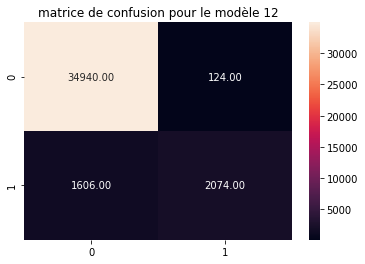

In [125]:
# Modèle 12, Boosting
#AdaBoostRegressor
from sklearn.metrics import confusion_matrix
model12 = confusion_matrix(y_test4, y_test_pred12.round())
sns.heatmap(model12, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 12')
plt.show()

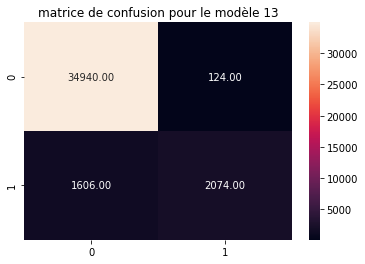

In [145]:
# Modèle 13, Extreme Gradient Boosting
# XGBRegressor
from sklearn.metrics import confusion_matrix
model13 = confusion_matrix(y_test4, y_test_pred13)
sns.heatmap(model13, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 13')
plt.show()

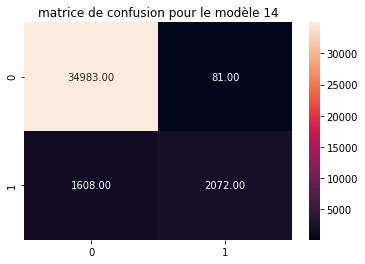

In [229]:
# Modèle 14
# Voting
from sklearn.metrics import confusion_matrix
model14 = confusion_matrix(y_test4, y_test_pred14)
sns.heatmap(model14, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 14')
plt.show()

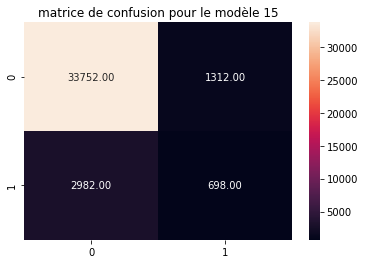

In [245]:
# Modèle 15
# Stacking
from sklearn.metrics import confusion_matrix
model15 = confusion_matrix(y_test4, y_test_pred15)
sns.heatmap(model15, annot=True, fmt='.2f' )
plt.title('matrice de confusion pour le modèle 15')
plt.show()